[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/EsercizioSvolto_Capitolo_02_Esercizio_3.ipynb)


# Esercizio 2.4.3

In [2]:
!pip install pandas seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.5 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file
df = pd.read_excel("data/reddito_popolazione.xlsx")


1. Analisi di base

In [4]:
# Numero di righe e colonne
shape = df.shape

# Controllo valori mancanti
missing_values = df.isnull().sum()

shape, missing_values


((940, 4),
 Eta            0
 Genere         0
 Reddito        0
 Provenienza    0
 dtype: int64)

2. Statistiche descrittive

In [5]:
# Calcola l'età media, reddito mediano e reddito minimo e massimo
average_age = df['Eta'].mean()
median_income = df['Reddito'].median()
min_income = df['Reddito'].min()
max_income = df['Reddito'].max()

print(f"Età media: {average_age}")
print(f"Reddito mediano: {median_income}")
print(f"Reddito minimo: {min_income}")
print(f"Reddito massimo: {max_income}")

Età media: 36.97021276595745
Reddito mediano: 27.0
Reddito minimo: 10
Reddito massimo: 86


3. Analisi per genere

In [6]:
# Numero di persone per genere
gender_counts = df['Genere'].value_counts()

# Età media per genere
average_age_gender = df.groupby('Genere')['Eta'].mean()

# Reddito medio per genere
average_income_gender = df.groupby('Genere')['Reddito'].mean()

gender_counts, average_age_gender, average_income_gender


(Genere
 m    750
 f    190
 Name: count, dtype: int64,
 Genere
 f    37.742105
 m    36.774667
 Name: Eta, dtype: float64,
 Genere
 f    27.357895
 m    28.338667
 Name: Reddito, dtype: float64)

4. Analisi per provenienza

In [7]:
# Numero di persone per provenienza
origin_counts = df['Provenienza'].value_counts()

# Età media per provenienza
average_age_origin = df.groupby('Provenienza')['Eta'].mean()

# Reddito medio per provenienza
average_income_origin = df.groupby('Provenienza')['Reddito'].mean()

origin_counts, average_age_origin, average_income_origin


(Provenienza
 suburbano    437
 urbano       372
 rurale       131
 Name: count, dtype: int64,
 Provenienza
 rurale       37.709924
 suburbano    37.281465
 urbano       36.344086
 Name: Eta, dtype: float64,
 Provenienza
 rurale       28.053435
 suburbano    28.489703
 urbano       27.760753
 Name: Reddito, dtype: float64)

Un'altro modo per fare più statistiche sugli stessi gruppi la si può fare utilizzando la funzione "agg"

In [8]:
# Calcola l'età media e il reddito medio per genere usando agg
gender_analysis = df.groupby('Genere').agg({
    'Eta': 'mean',
    'Reddito': 'mean'
}).reset_index()

gender_counts, gender_analysis

(Genere
 m    750
 f    190
 Name: count, dtype: int64,
   Genere        Eta    Reddito
 0      f  37.742105  27.357895
 1      m  36.774667  28.338667)

5. Combinazione genere e provenienza

In [9]:
# Reddito medio delle donne provenienti da aree urbane
urban_female_income = df[(df['Genere'] == 'f') & (df['Provenienza'] == 'urbano')]['Reddito'].mean()

# Età media degli uomini provenienti da aree rurali
rural_male_age = df[(df['Genere'] == 'm') & (df['Provenienza'] == 'rurale')]['Eta'].mean()

urban_female_income, rural_male_age


(28.943661971830984, 38.35294117647059)

6. Filtri e ordinamento

In [10]:
# Numero di persone con reddito > 20 e genere femminile
high_income_females = df[(df['Reddito'] > 20) & (df['Genere'] == 'f')].shape[0] # oppure si può usare len()

# Top 5 persone per reddito
top5_income = df.sort_values(by='Reddito', ascending=False).head(5)

high_income_females, top5_income


(137,
      Eta Genere  Reddito Provenienza
 824   35      m       86   suburbano
 564   25      f       80      urbano
 883  113      m       68   suburbano
 632   48      m       67   suburbano
 431   42      m       67      rurale)

7. Operazioni avanzate

In [11]:
# Aggiungi una nuova colonna "Categoria Età"
df['Categoria Età'] = pd.cut(df['Eta'], bins=[0, 30, 50, float('inf')], labels=['Giovane', 'Adulto', 'Anziano'])

# Conta per categoria età
age_category_counts = df['Categoria Età'].value_counts()

# Reddito medio delle persone "Giovane" da aree suburbane
young_suburban_income = df[(df['Categoria Età'] == 'Giovane') & (df['Provenienza'] == 'suburbano')]['Reddito'].mean()

age_category_counts, young_suburban_income

(Categoria Età
 Adulto     421
 Giovane    385
 Anziano    134
 Name: count, dtype: int64,
 27.934065934065934)

8. Visualizzazione dei dati

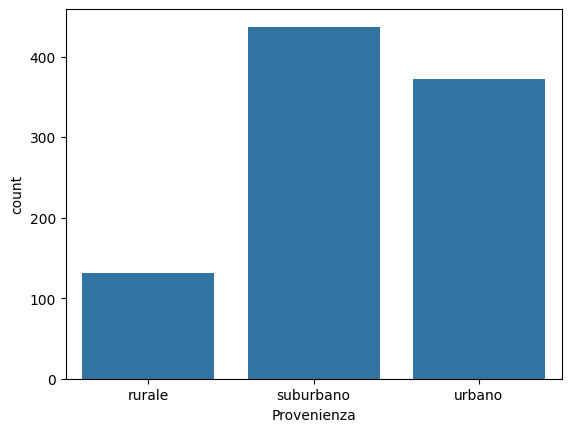

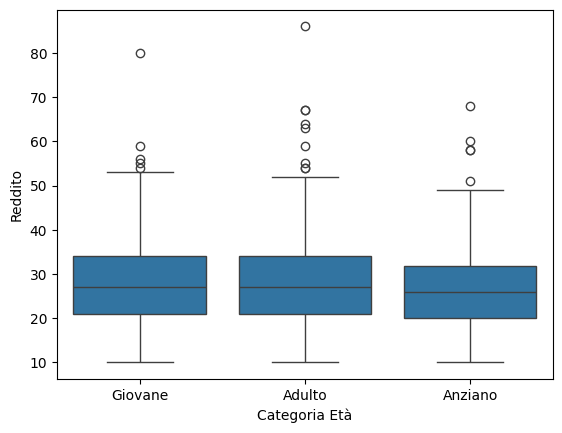

In [13]:
# Grafico a barre per provenienza
sns.countplot(data=df, x='Provenienza')
plt.show()

# Boxplot per reddito per genere
sns.boxplot(data=df, x='Categoria Età', y='Reddito')
plt.show()
